# Predicting Sale Prices for Ames Iowa Housing Dataset
By: Aryeh Gelfand(https://git.generalassemb.ly/aryehgelfand)

## Problem Statement

I have been hired by the Ames Iowa Organization of Real Estate Agents in order to help them create better pricing models. Right now, they are using primitive comparative pricing metrics that aren't fit to the data available for the town.
We have a dataset curated by Dr.Dean De Cock, a professor at Truman State University, that tracks 2051 real estate transactions that took place between 2006 and 2010 with 81 characteristics. We have been hired to create better price modeling for these real estate agents in order to help them add value to thier clients.

The plan is to use this data set to train a model that can accurately predict pricing, the metric we are using for success is Root Mean Squared Error, we will see how low we can get our it.
* We will start by evaluating our features 
* Searching the dataframe for missing data
* filling in missing data with proportional data points
* generating new interaction terms
* Training Linear Regression, LR with Ridge regularization and LASSO Regularization.
* Then we will evaluate the models and choose the one with the lowest RMSE



##  Executive Summary

#### Data Cleaning
This resulted in a large amount of null values. We also changed  values proportional to the values that we had. 
Then we changed categorical values that were ordinal to integer values. We also created dummy columns.

##### EDA
We got the features with the top correlation coefficient and made interaction terms with them. Then made pair plots of these top performing features. 
We also engineered 12 new features based on categories likely to be related. Then we checked the correlation for these new values and scored them.

#### Modeling
We split the data into train and test values

#### Baseline
The baseline resulted in a model with a RMSE of 79K. 

#### LInear regression
The training scores were significantly better than the testing scores and is therefore overfit.
Traing RMSE was 20882
Testing RMSE was 23409

#### Ridge
The regularization helped lower the error, we also used Ridge_CV to find the optimized Alpha at 10
Training RMSE is 20996
Testing RMSE 22118

#### LASSSO
The regularization didnt help as much, but still resulted in a better score than LR
Training was 20881
Testing was 22981

#### Model Selection
We selected the ridge model with an alpha of 10, because it resulted in the lowest RMSE

#### Model Evaluation
We used three graphs to evaluate the model.
* A error distribution that proved that the erros have a normal distribution
* A residual plot that showed a mean of 0
* A Predicton vs True plot that showed homoskedasticity of errors

#### Conclusions and Recommedation

* When making models for the future, focus on subjective metrics like Overall Qual, Ext Quality, and Overal Cond, these have more of an effect than objective metrics like number of bedrooms or baths.
* Also, the strategy of creating a lot of interaction columns and dummy variables and then using regularizatioin to scale it back has been succesfull and should be replicated.
* The missing data strategy was also successful but has to be done in conjunction with the data dictionary.
* Eliminate outliers in the target variable as these can cause the distribution to become skewed. This will result in in accurate predictions






# Table of Contents
1. [Loading Data]()
2. [Data Cleaning](#example2)
3. [EDA](#third-example)
4. [Modeling](#fourth-examplehttpwwwfourthexamplecom)
5. [Baseline ](#fourth-examplehttpwwwfourthexamplecom)
6. [Linear Regression ](#fourth-examplehttpwwwfourthexamplecom)
7. [Ridge ](#fourth-examplehttpwwwfourthexamplecom)
8. [LASSO ](#fourth-examplehttpwwwfourthexamplecom)
9. [Model Selection ](#fourth-examplehttpwwwfourthexamplecom)
10. [Model Evaluation](#fourth-examplehttpwwwfourthexamplecom)
11. [Conclusions/Recommendations](#fourth-examplehttpwwwfourthexamplecom)
12. [References](#fourth-examplehttpwwwfourthexamplecom)





## Loading Data

In [1]:
import warnings
warnings.filterwarnings("ignore") # Shhhh
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV, MultiTaskLassoCV
from scipy import stats

RANDOM_STATE  = 123

In [2]:
data = pd.read_csv("../datasets/train.csv")# train_csv this is dataset

In [3]:
train = list(data.columns)


In [4]:
data.shape

(2051, 81)

# Data Cleaning

In [5]:
def missing_values_table(df):
        mis_val = df.isnull().sum()# counts null values
        mis_val_percent = 100 * df.isnull().sum() / len(df)# get percentage null per colimn
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)# concats those columns together
        mis_val_table_ren_columns = mis_val_table.rename(# renames columns
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(# sorts by ascending
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns# prints datframe with columns and percentage missing
# took this function from stack overflow https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

In [6]:
missing_values_table(data)# counts nulls by columns and percentage null

Your selected dataframe has 81 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
Pool QC,2042,99.6
Misc Feature,1986,96.8
Alley,1911,93.2
Fence,1651,80.5
Fireplace Qu,1000,48.8
Lot Frontage,330,16.1
Garage Yr Blt,114,5.6
Garage Cond,114,5.6
Garage Qual,114,5.6
Garage Finish,114,5.6


In [7]:
data.shape

(2051, 81)

In [8]:
data.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Data looks normal as far as I can tell at this stage.

In [9]:
 # Dropping columns missing 48% or more values

data['Lot Frontage'].fillna(data['Lot Frontage'].mean(),inplace = True)# fill missing lot frontage wth mean value



data.replace({'Ex': 5,'Gd' : 4,'Ta': 3,'Fa': 2,'Po':1,'Na':0,'TA':3},inplace=True)

data.replace({'GLQ': 6,'ALQ' : 5,'BLQ': 4,'Rec': 3,'LWQ':2,'LwQ':2,'Unf':1,'NA':0},inplace=True)

data.replace({'Y': 4,'Av' : 3,'Mn': 2,'No': 1,'NA':0},inplace=True)

data.replace({'Gd': 4,'Av' : 3,'Mn': 2,'No': 1,'NA':0},inplace=True)# replacing ordinal categorical values

data.replace({'Fin': 4,'RFn' : 3,'Unf': 2,'NA':0},inplace=True)

data.replace({'2Types': 4,'Detchd' : 3,'Basment': 2,'BuiltIn': 2,'Attchd':2,'CarPort':1,'NA':0},inplace=True)

data.replace({'SBrkr':3,'FuseA':2,'FuseF':1,'FuseP':1,'Mix':2},inplace=True)   

data['Street'].replace({'Grvl':2,'Pave':1,'NA':0})

data.replace({'Y':2,'P':1,'N':0},inplace=True)# replacing ordinal categorical values



data.replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0},inplace=True)

data['Land Slope'].replace({'Gtl':3,'Mod':2,'Sev':1},inplace=True)
data['Lot Shape'].replace({'Reg':4,'IR1':3,'IR2':2,'IR3':1},inplace=True)

data['Utilities'].replace({'AllPub':2,'NoSewr':0,'NoSeWa':0},inplace=True)

data['Functional'].replace({'Min2':2,'Min1':2,'Mod':1,'Maj1':0,'Maj2':0},inplace=True)# replacing ordinal categorical values


data.replace({'Norm':2,'Feedr':1,'Artery':0,'RRAn':0,'PosN':3,'PosA':3,'RRAe':0,'RRNn':0,'RRNe':0},inplace=True)
data.replace({'1Fam':3,'TwnhsE':1,'Duplex':1,'Twnhs':1,'2fmCon':1},inplace=True)
data['Pool QC'].fillna(0,inplace=True)

data['Misc Feature'].replace({'Elev':3,'Gar2':3,'Othr':1,'Shed':1,'TenC':2},inplace=True)

data['Alley'].replace({'Grvl':1,'Pave':2},inplace=True)# replacing ordinal categorical values





data['Alley'].fillna(0,inplace=True)# filling houses with no alley
data['Fireplace Qu'].fillna(0,inplace=True)# fillinghouses with no fireplace

data['Misc Feature'].fillna(0,inplace=True)

data.replace({'GdPrv':3,'MnPrv':1,'GdWo':2,'MnWw':1,'NA':0})
data['Fence'].fillna(0,inplace=True)# filling in properties with no fence

dummy_list = ['MS Zoning','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Sale Type']
def fill_na(data,col):
    dict_1 = dict(data[col].value_counts(normalize = True))# get normalized value counts in a dictionary
    keys = list(dict_1.keys())
    values = list(dict_1.values())
    for k,v in dict_1.items():
        data[col] = data[col].fillna(pd.Series(np.random.choice(keys,p=values, size=len(data))))# fills in nulls with proportional values

fill_na(data,'Garage Cond')
fill_na(data,'Garage Type')
fill_na(data,'Garage Qual')
fill_na(data,'Garage Finish')
fill_na(data, 'Garage Yr Blt')
fill_na(data,'Bsmt Exposure')
fill_na(data,'BsmtFin Type 2')
fill_na(data,'Bsmt Qual')
fill_na(data,'Bsmt Cond')

fill_na(data,'BsmtFin Type 1')
fill_na(data,'Mas Vnr Type')
fill_na(data,'Mas Vnr Area')
fill_na(data,'Bsmt Full Bath')
fill_na(data,'Bsmt Half Bath')
fill_na(data,'BsmtFin SF 1')
fill_na(data,'BsmtFin SF 2')
fill_na(data,'Bsmt Unf SF')
fill_na(data,'Total Bsmt SF')
fill_na(data,'Garage Cars')
fill_na(data,'Garage Area')#fills nulls for these columns
for i in dummy_list:
    fill_na(data,i)
data['Garage Type'] = data['Garage Type'].astype('float64')
data['Garage Cars'] = data['Garage Cars'].astype('float64')
data['Garage Area'] = data['Garage Area'].astype('float64')#change type to float

# filling in nans with values that proportianate to the rest of the data set

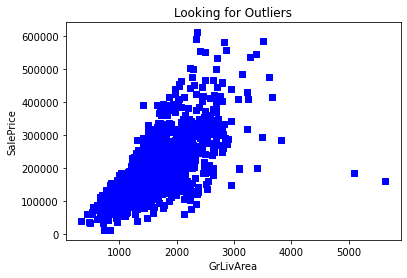

In [10]:
plt.scatter(data['Gr Liv Area'], data['SalePrice'], c = "blue", marker = "s")
plt.title("Looking for Outliers")#  plot over 4k square foot outliers
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

data = data[data['Gr Liv Area'] < 4000]
data = data[data['Gr Liv Area'] < 4000]#remove these outliers





In [11]:
corr_df = pd.DataFrame(data.corr()['SalePrice'])# split up over .5 correlation coefficient
strong_pos = corr_df['SalePrice'] > .5
data

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,0.0,3,Lvl,...,0,0,0.0,0,0.0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,0.0,3,Lvl,...,0,0,0.0,0,0.0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,0.0,4,Lvl,...,0,0,0.0,0,0.0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,0.0,4,Lvl,...,0,0,0.0,0,0.0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,0.0,3,Lvl,...,0,0,0.0,0,0.0,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0000,11449,Pave,0.0,3,HLS,...,0,0,0.0,0,0.0,0,1,2008,WD,298751
2047,785,905377130,30,RL,69.0552,12342,Pave,0.0,3,Lvl,...,0,0,0.0,0,0.0,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0000,7558,Pave,0.0,4,Bnk,...,0,0,0.0,0,0.0,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0000,10400,Pave,0.0,4,Lvl,...,0,0,0.0,0,0.0,0,11,2009,WD,144000


## EDA

Text(0.5, 1.0, 'Features With Correlation Above .5')

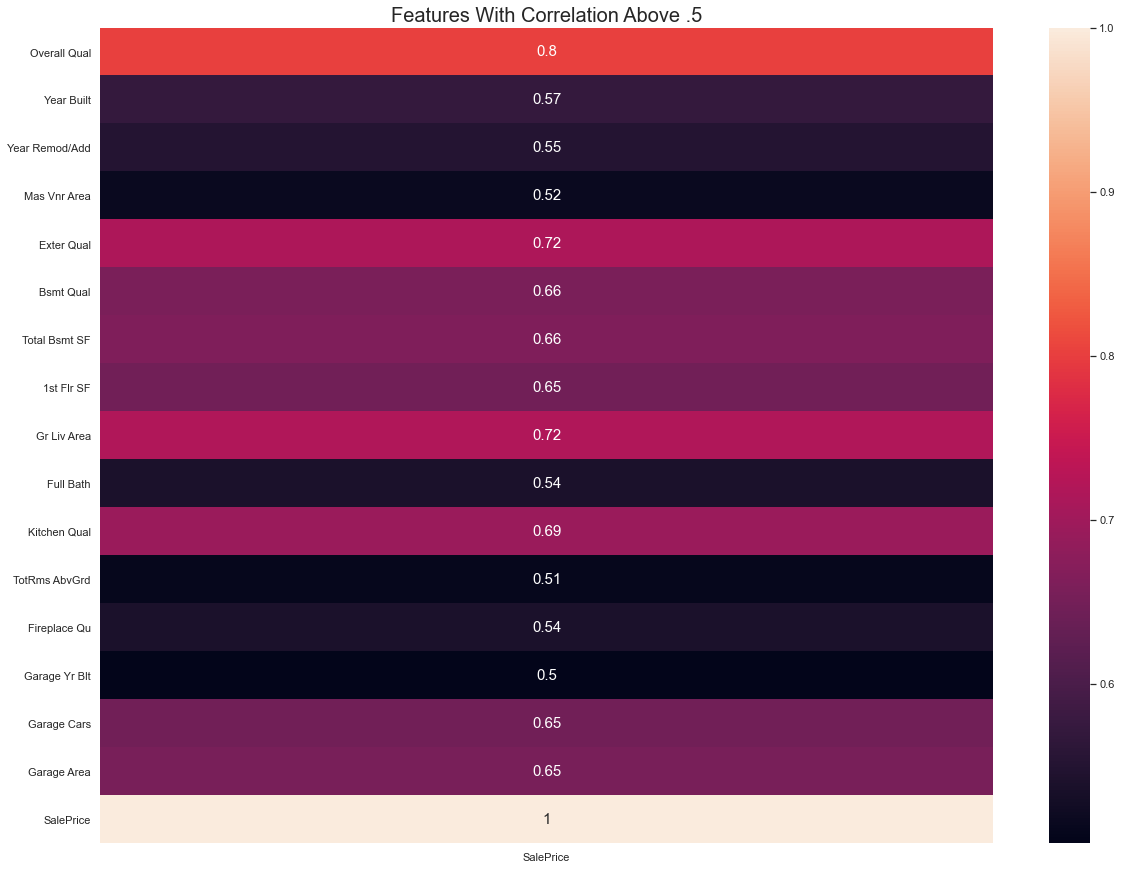

In [12]:

sns.set(style="white")# plot strong coefficient values
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_df[strong_pos],annot=True,annot_kws={"size":15})
plt.title('Features With Correlation Above .5',{'fontsize': 20})

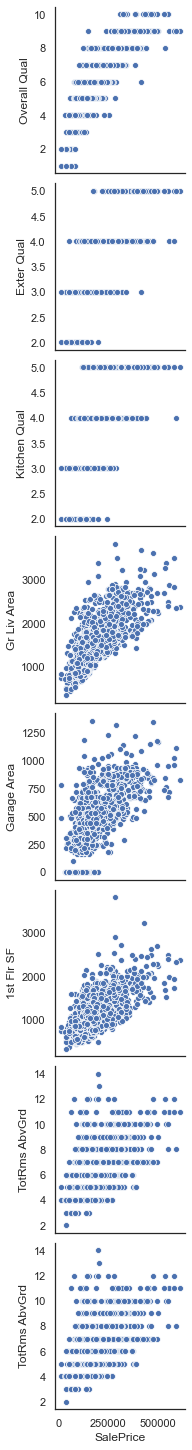

In [13]:
sns.pairplot(data, y_vars=['Overall Qual','Exter Qual','Kitchen Qual', 'Gr Liv Area','Garage Area','1st Flr SF','TotRms AbvGrd','TotRms AbvGrd'], x_vars=['SalePrice'])
# plot hiogh correlation columns

* These seem to follow positive linear relationship with price. These are good features to start with. 
* Possible outliers in some

In [15]:
data['garage_score'] = data['Garage Qual'] * data['Garage Cond'] * data['Garage Qual'] * data['Garage Cond']# creating new features based on likely relationship
data['basement_score'] = data['Bsmt Full Bath'] * data['Bsmt Half Bath'] * data['BsmtFin Type 2'] * data['BsmtFin SF 2'] * data['Bsmt Unf SF'] * data['Total Bsmt SF'] * data['Bsmt Qual'] * data['Bsmt Cond'] * data['Bsmt Exposure'] * data['BsmtFin Type 1'] * data['BsmtFin SF 1']
data['bath_score'] = data['Full Bath'] * data['Half Bath']# creating new features based on likely relationship
data['ext_score'] =  data['Exter Qual'] * data['Exter Cond']# creating new features based on likely relationship
data['outdoor_score'] =  data['Paved Drive'] * data['Wood Deck SF'] * data['Open Porch SF'] * data['Enclosed Porch'] * data['3Ssn Porch'] * data['Screen Porch']

In [16]:
data['pool_score'] = data['Pool Area'] * data['Pool QC']# creating new features based on likely relationship
data['fireplace_score'] = data['Fireplaces'] * data['Fireplace Qu']
data['kitchen_score'] = data['Kitchen AbvGr'] * data['Kitchen Qual']# creating new features based on likely relationship
data['misc_score'] = data['Misc Val'] * data['Misc Feature']
data['land_score'] = data['Lot Frontage'] * data['Lot Area'] * data['Alley'] * data['Lot Shape'] * data['Utilities'] * data['Land Slope']
data['quality_score'] = data['Overall Qual'] * data['Overall Cond'] * data['Kitchen Qual']   
data['size_score']  = data['1st Flr SF'] * data['2nd Flr SF'] * data['Low Qual Fin SF'] * data['Gr Liv Area']# creating new features based on likely relationship
for i in dummy_list:
    fill_na(data,i)# fill in dummy list Nulls

In [17]:
zoning_dummys = pd.get_dummies(data, columns = ['MS Zoning','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Sale Type'], drop_first=True)
data = pd.concat([data, zoning_dummys],axis=1)# get dummies and concatenate to DF
data.fillna(0,inplace=True)z

In [18]:
data.shape

(2049, 281)

In [19]:
data = data.drop_duplicates()# drop possible duplicates

In [20]:
feat_list = data.drop(columns = ['SalePrice'])# drop target from features
names = feat_list.select_dtypes(include ='number') 
first = list(names.columns)# get feature list


In [21]:
len(first)

260

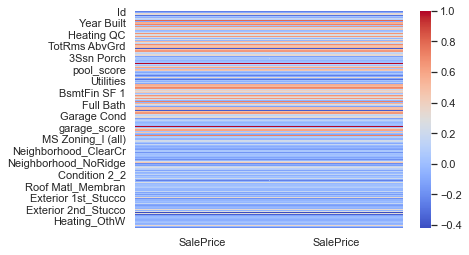

In [22]:
sns.heatmap(pd.DataFrame(data.corr()['SalePrice']), cmap='coolwarm');# new features that are performing well to look out for

These new features are adding correlation and performing well. These new features are worth keeping in the model.

## Modeling 

### Baseline Model

In [23]:
X = data[first]
y = data["SalePrice"]# split in to test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [24]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]# erase duplicated colukns for each
X_test = X_test.loc[:,~X_test.columns.duplicated()]

In [25]:

#mean_squared_error(y_train,y_train.mean())
y_pred = y_train.mean()
Baseline  = np.sqrt(((y-y_pred)**2).mean())

print('Baseline RMSE is {}'.format(Baseline))# Get RMSE for baseline model

Baseline RMSE is SalePrice    79295.416281
SalePrice    79295.416281
dtype: float64


Very high baseline RMSE should not be hard to beat

### Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(X_test, y_test)

lr.fit(X_train, y_train)# fit linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_train_preds = lr.predict(X_train)# generate preds

In [29]:

Baseline  = np.sqrt(((y_train_preds-y_train)**2).mean())

print('Training RMSE is {}'.format(Baseline))# training score

Training RMSE is SalePrice    20882.927959
SalePrice    20882.927959
dtype: float64


In [30]:
y_test_preds = lr.predict(X_test)

In [31]:
Baseline  = np.sqrt(((y_test_preds-y_test)**2).mean())

print('Test RMSE is {}'.format(Baseline))# test score

Test RMSE is SalePrice    23409.279323
SalePrice    23409.279323
dtype: float64


The model is significantly overfit, but is performing well given the amount of features

In [169]:
resids = (y_test - y_test_preds)

Text(0, 0.5, 'Pred Values')

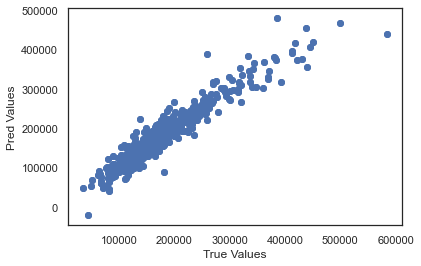

In [173]:
plt.scatter(y_test,y_test_preds)
plt.xlabel('True Values')
plt.ylabel('Pred Values')

The values in the lower range seem to be more accurate but as values go up they become less so.
Generally, the prediction is pretty spot on.

In [174]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

0.8774895409605424

The model is accurate across many iterations of X_train and doesnt loss much r squared score 

### Scale

In [35]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)# We must scale the data nefore regularization

### Ridge 

In [36]:
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))


0.9309729375919457
0.9176828473625492


These are very high score even without optimization

In [37]:
from sklearn.linear_model import RidgeCV

r_alphas = np.logspace(-10, 5, 100)# searhc this range for optimized alpha

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(Z_train, y_train)

In [38]:
ridge_cv.alpha# optimized alpaha is 10

10

In [39]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))
# we already had the optimized alpha

0.9309729375919457
0.9176828473625492


In [40]:
ridge_pred = ridge_cv.predict(Z_train)

Baseline  = np.sqrt(((ridge_pred-y_train)**2).mean())

print('Ridge Training RMSE is {}'.format(Baseline))# training score

Ridge Training RMSE is SalePrice    20996.850573
SalePrice    20996.850573
dtype: float64


In [41]:
ridge_pred_test = ridge_cv.predict(Z_test)

Baseline  = np.sqrt(((ridge_pred_test-y_test)**2).mean())

print('Ridge Test RMSE is {}'.format(Baseline))# training score

Ridge Test RMSE is SalePrice    22118.642329
SalePrice    22118.642329
dtype: float64


Our model is still overfit but is improving

### Lasso

In [175]:
lasso_model = Lasso(1.0)

# Fit.
lasso_model.fit(Z_train, y_train)






Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [176]:
lasso_pred_train = lasso_model.predict(Z_train)

Baseline  = np.sqrt(((lasso_pred_train-y_train)**2).mean())

print('Training RMSE is {}'.format(Baseline))# training score

Training RMSE is SalePrice    20881.90426
SalePrice    20881.90426
dtype: float64


In [177]:
lasso_pred_test = lasso_model.predict(Z_test)

Baseline  = (np.sqrt(((lasso_pred_test-y_test)**2).mean()))

print('LASSO RMSE is {}'.format(Baseline))# training score

LASSO RMSE is SalePrice    22981.207653
SalePrice    22981.207653
dtype: float64


Our training RMSE was the best yet, but the test RMSE didnt beat the ridge one. 


## Model Selection

The Ridge Model had the lowest RMSE, so we are choosing it.

## Model Evaluation

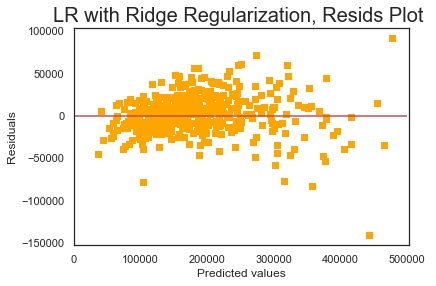

In [126]:
plt.scatter(ridge_pred_test, ridge_pred_test - y_test, c = "orange", marker = "s", label = "Validation data")
plt.title("LR with Ridge Regularization, Resids Plot ",{'fontsize': 20}# plotting ridge resids plot 
         )
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.xlim(0)
plt.hlines(y = 0, xmin = 0, xmax = 500000, colors='r', linestyles='solid')

plt.show()


Mean is around zero which is what we are looking for. Independence of errors, no patterns.

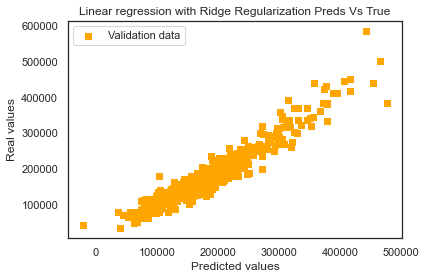

In [156]:
plt.scatter(ridge_pred_test,y_test,c = "orange", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge Regularization Preds Vs True")
plt.xlabel("Predicted values")# plotting real vs true plot
plt.ylabel("Real values")
plt.legend(loc = "upper left")




The real vs predicted values hold true with homoskedasticity of errors. 

(-100000.0, 103870.70208214004)

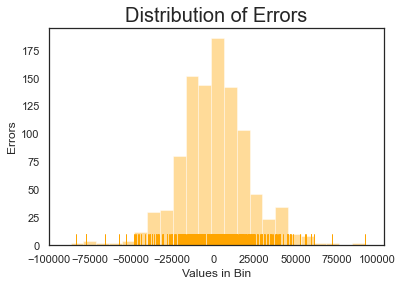

In [47]:
sns.distplot(ridge_pred_test-y_test, kde=False, rug=True,bins=30,color= 'orange')
plt.plot(figsize=(30,20))
plt.title("Distribution of Errors",{'fontsize': 20})
plt.xlabel("Values in Bin")
plt.ylabel("Errors")
plt.xlim(-100000)



Basically normal distribution of errors but a little skewed to the right shich falls in line woth other plots.

## Conclusion/ Reccomendations

 - When making models for the future, focus on subjective metrics like Overall Qual, Ext Quality, and Overal Cond, these have more of an effect than objective metrics like number of bedrooms or baths.
 - Also, the strategy of creating a lot of interaction columns and dummy variables and then using regularizatioin to scale it back has been succesfull and should be replicated.
 - The missing data strategy was also successful but has to be done in conjunction with the data dictionary.
 - Eliminate outliers in the target variable as these can cause the distribution to become skewed. This will result in in accurate predictions

### Data Dictionary

 - http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
  

 ### References
 

- http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- http://jse.amstat.org/v19n3/decock.pdf

### Kaggle Submission Area

In [48]:
data = pd.read_csv("../datasets/test.csv")

In [49]:
data.shape
# Kaggle Submission
#Model workflow with validation or holdout set in order to submit

(878, 80)

In [50]:
data['Lot Frontage'].fillna(data['Lot Frontage'].mean(),inplace = True)# fill missing lot frontage wth mean value



data.replace({'Ex': 5,'Gd' : 4,'Ta': 3,'Fa': 2,'Po':1,'Na':0,'TA':3},inplace=True)

data.replace({'GLQ': 6,'ALQ' : 5,'BLQ': 4,'Rec': 3,'LWQ':2,'LwQ':2,'Unf':1,'NA':0},inplace=True)

data.replace({'Y': 4,'Av' : 3,'Mn': 2,'No': 1,'NA':0},inplace=True)

In [51]:
data.shape

(878, 80)

In [52]:
data.replace({'Gd': 4,'Av' : 3,'Mn': 2,'No': 1,'NA':0},inplace=True)

data.replace({'Fin': 4,'RFn' : 3,'Unf': 2,'NA':0},inplace=True)

data.replace({'2Types': 4,'Detchd' : 3,'Basment': 2,'BuiltIn': 2,'Attchd':2,'CarPort':1,'NA':0},inplace=True)

data.replace({'SBrkr':3,'FuseA':2,'FuseF':1,'FuseP':1,'Mix':2},inplace=True)   

data['Street'].replace({'Grvl':2,'Pave':1,'NA':0})

data.replace({'Y':2,'P':1,'N':0},inplace=True)

data.replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0},inplace=True)

In [53]:
data.shape

(878, 80)

In [54]:
data['Land Slope'].replace({'Gtl':3,'Mod':2,'Sev':1},inplace=True)
data['Lot Shape'].replace({'Reg':4,'IR1':3,'IR2':2,'IR3':1},inplace=True)

data['Utilities'].replace({'AllPub':2,'NoSewr':0,'NoSeWa':0},inplace=True)

data['Functional'].replace({'Min2':2,'Min1':2,'Mod':1,'Maj1':0,'Maj2':0},inplace=True)

data.replace({'Norm':2,'Feedr':1,'Artery':0,'RRAn':0,'PosN':3,'PosA':3,'RRAe':0,'RRNn':0,'RRNe':0},inplace=True)
data.replace({'1Fam':3,'TwnhsE':1,'Duplex':1,'Twnhs':1,'2fmCon':1},inplace=True)
data['Pool QC'].fillna(0,inplace=True)

data['Misc Feature'].replace({'Elev':3,'Gar2':3,'Othr':1,'Shed':1,'TenC':2},inplace=True)

data['Alley'].replace({'Grvl':1,'Pave':2},inplace=True)



data['Alley'].fillna(0,inplace=True)
data['Fireplace Qu'].fillna(0,inplace=True)

data['Misc Feature'].fillna(0,inplace=True)

data.replace({'GdPrv':3,'MnPrv':1,'GdWo':2,'MnWw':1,'NA':0})
data['Fence'].fillna(0,inplace=True)
#data = data[data['Gr Liv Area'] < 4000]
dummy_list = ['MS Zoning','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Sale Type']
def fill_na(data,col):
    dict_1 = dict(data[col].value_counts(normalize = True))
    keys = list(dict_1.keys())
    values = list(dict_1.values())
    for k,v in dict_1.items():
        data[col] = data[col].fillna(pd.Series(np.random.choice(keys,p=values, size=len(data))))

fill_na(data,'Garage Cond')
fill_na(data,'Garage Type')
fill_na(data,'Garage Qual')
fill_na(data,'Garage Finish')
fill_na(data, 'Garage Yr Blt')
fill_na(data,'Bsmt Exposure')
fill_na(data,'BsmtFin Type 2')
fill_na(data,'Bsmt Qual')
fill_na(data,'Bsmt Cond')

fill_na(data,'BsmtFin Type 1')
fill_na(data,'Mas Vnr Type')
fill_na(data,'Mas Vnr Area')
fill_na(data,'Bsmt Full Bath')
fill_na(data,'Bsmt Half Bath')
fill_na(data,'BsmtFin SF 1')
fill_na(data,'BsmtFin SF 2')
fill_na(data,'Bsmt Unf SF')
fill_na(data,'Total Bsmt SF')
fill_na(data,'Garage Cars')
fill_na(data,'Garage Area')
for i in dummy_list:
    fill_na(data,i)
data['Garage Type'] = data['Garage Type'].astype('float64')
data['Garage Cars'] = data['Garage Cars'].astype('float64')
data['Garage Area'] = data['Garage Area'].astype('float64')

In [55]:
data['garage_score'] = data['Garage Qual'] * data['Garage Cond'] * data['Garage Qual'] * data['Garage Cond'] * data['Garage Area'] * data['Garage Cars'] * data['Garage Yr Blt'] * data['Garage Finish']
data['basement_score'] = data['Bsmt Full Bath'] * data['Bsmt Half Bath'] * data['BsmtFin Type 2'] * data['BsmtFin SF 2'] * data['Bsmt Unf SF'] * data['Total Bsmt SF'] * data['Bsmt Qual'] * data['Bsmt Cond'] * data['Bsmt Exposure'] * data['BsmtFin Type 1'] * data['BsmtFin SF 1']
data['bath_score'] = data['Full Bath'] * data['Half Bath'] 
data['ext_score'] =  data['Exter Qual'] * data['Exter Cond']  
data['outdoor_score'] =  data['Paved Drive'] * data['Wood Deck SF'] * data['Open Porch SF'] * data['Enclosed Porch'] * data['3Ssn Porch'] * data['Screen Porch']
data['pool_score'] = data['Pool Area'] * data['Pool QC']
data['fireplace_score'] = data['Fireplaces'] * data['Fireplace Qu']
data['kitchen_score'] = data['Kitchen AbvGr'] * data['Kitchen Qual']
data['misc_score'] = data['Misc Val'] * data['Misc Feature']
data['land_score'] = data['Lot Frontage'] * data['Lot Area'] * data['Alley'] * data['Lot Shape'] * data['Utilities'] * data['Land Slope']
data['quality_score'] = data['Overall Qual'] * data['Overall Cond'] 
data['size_score']  = data['1st Flr SF'] * data['2nd Flr SF'] * data['Low Qual Fin SF'] * data['Gr Liv Area']

In [56]:
data.shape

(878, 92)

In [57]:
for i in dummy_list:
    fill_na(data,i)
data = pd.get_dummies(data, columns = ['MS Zoning','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Sale Type'], drop_first=True)

data.fillna(0,inplace=True)



# this code is adpated from https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset/notebook

In [58]:
names = data.select_dtypes(include ='number') 
features  = names.columns

In [59]:
# filter features
filtered_val = data[features]


In [60]:
len(set(filtered_val.columns))

181

In [104]:
X_list = list(X_train)
val_list = list(filtered_val)

In [105]:
for i in val_list:
    if i not in X_list:
        filtered_val.drop(columns = i,inplace=True)

In [106]:
X_train.shape

(1536, 186)

In [107]:
filtered_val.shape

(878, 186)

In [109]:

preds = lr.predict(filtered_val)


In [110]:
preds = preds.flatten()

In [111]:
preds[:10]

array([ 8.62395009e+10,  8.62395009e+10, -2.46065242e+11, -2.46065242e+11,
       -1.37536000e+11, -1.37536000e+11, -2.21538438e+10, -2.21538438e+10,
       -1.62389947e+11, -1.62389947e+11])

In [112]:

# We need to submit to Kaggle in the appropriate form of .csv

# create prediction Series
preds_col = pd.Series(preds, name = "SalePrice")

# combine with Id
id_col    = data["Id"]
output = pd.concat([id_col, preds_col], axis = 1)


In [113]:
len(output)

1756

In [114]:
output.to_csv("../output/submission.csv",index=False)

In [115]:
output.shape

(1756, 2)